✅ Loaded 2589 frames from multiple movies for genre: ActionKeyframes
✅ Loaded 2050 frames from multiple movies for genre: DocumentaryKeyframes
✅ Loaded 1978 frames from multiple movies for genre: DramaKeyframes
✅ Montage generated successfully with diverse scene selection.


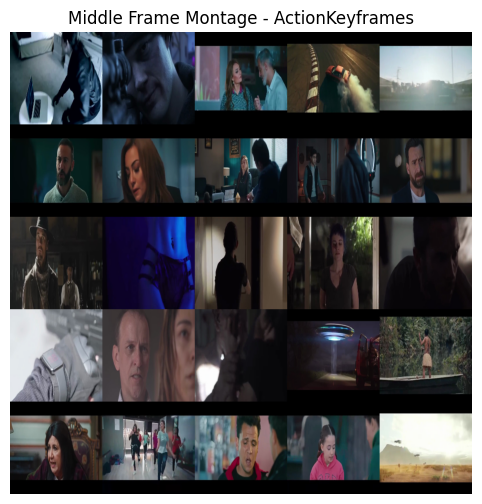

✅ Montage image saved for ActionKeyframes: montages/ActionKeyframes_montage.png
✅ K-Means clustering completed.
✅ Montage generated successfully with diverse scene selection.


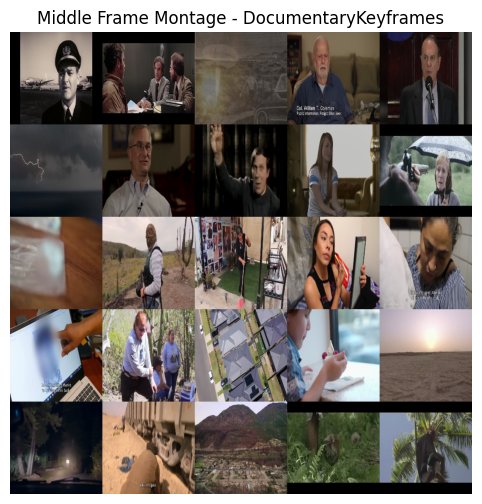

✅ Montage image saved for DocumentaryKeyframes: montages/DocumentaryKeyframes_montage.png
✅ K-Means clustering completed.
✅ Montage generated successfully with diverse scene selection.


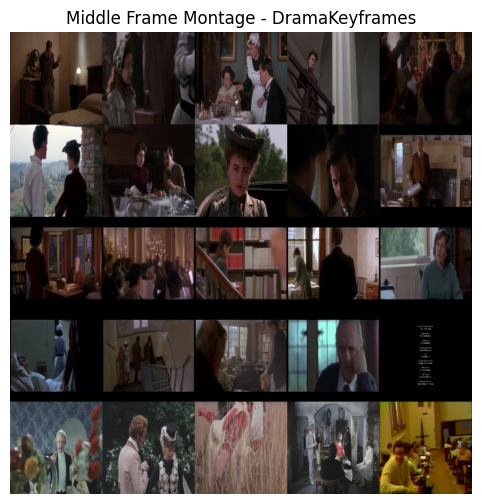

✅ Montage image saved for DramaKeyframes: montages/DramaKeyframes_montage.png
✅ K-Means clustering completed.


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def load_middle_frames_by_genre(middle_frame_folder):
    """Loads all middle frames, categorized by genre (subfolder names), ensuring diverse movie selection."""
    genre_frames = {}
    for genre in sorted(os.listdir(middle_frame_folder)):
        genre_path = os.path.join(middle_frame_folder, genre)
        if os.path.isdir(genre_path):
            frames = []
            movie_subfolders = [os.path.join(genre_path, sub) for sub in os.listdir(genre_path) if os.path.isdir(os.path.join(genre_path, sub))]
            for movie_folder in movie_subfolders:
                for root, _, files in os.walk(movie_folder):
                    frame_files = sorted([f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))])
                    for file in frame_files:
                        frame_path = os.path.join(root, file)
                        img = cv2.imread(frame_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format for visualization
                            frames.append(img)
            genre_frames[genre] = frames
            print(f"✅ Loaded {len(frames)} frames from multiple movies for genre: {genre}")
    return genre_frames

def generate_montage(frames, montage_size=(5, 5), frame_size=(200, 200)):
    """Creates a grid montage of middle frames, ensuring diverse representation."""
    if not frames:
        print("❌ No frames loaded. Please check the folder path.")
        return None
    
    num_frames = min(len(frames), montage_size[0] * montage_size[1])  # Ensure it fits the grid
    selected_frames = np.linspace(0, len(frames) - 1, num_frames, dtype=int)  # Spread selection across movies
    resized_frames = [cv2.resize(frames[i], frame_size) for i in selected_frames]
    
    rows = []
    for i in range(0, num_frames, montage_size[1]):
        row = np.hstack(resized_frames[i:i+montage_size[1]])
        rows.append(row)
    montage = np.vstack(rows)
    
    print("✅ Montage generated successfully with diverse scene selection.")
    return montage

def cluster_middle_frames(frames, n_clusters=3):
    """Applies K-Means clustering on middle frame colors."""
    if not frames:
        print("❌ No frames loaded. Please check the folder path.")
        return None
    
    # Convert images to feature vectors (mean color per frame)
    frame_features = [cv2.resize(frame, (50, 50)).reshape(-1, 3).mean(axis=0) for frame in frames]
    frame_features = np.array(frame_features)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(frame_features)
    
    print("✅ K-Means clustering completed.")
    return labels

def save_and_display_montage(montage, genre, output_folder="montages"): 
    """Saves and displays the montage for each genre separately."""
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, f"{genre}_montage.png")
    
    if montage is not None:
        plt.figure(figsize=(10, 6))
        plt.imshow(montage)
        plt.axis('off')
        plt.title(f"Middle Frame Montage - {genre}")
        plt.savefig(output_path, bbox_inches='tight', dpi=300)
        plt.show()
        print(f"✅ Montage image saved for {genre}: {output_path}")
    else:
        print(f"❌ No montage generated for {genre}.")

# Example Usage
middle_frame_folder = "/Users/alicja/Desktop/VideoAnalyse/Corpus/KeyFrames" 
genre_frames = load_middle_frames_by_genre(middle_frame_folder)

for genre, frames in genre_frames.items():
    montage_image = generate_montage(frames)
    save_and_display_montage(montage_image, genre)
    labels = cluster_middle_frames(frames)

